## 2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Creating path
path = r'C:\Users\Víctor A\Desktop\CAREER FOUNDRY\Immersion Achievement 6 Victor A.Gallardo\DATA'

#Importing Data
listings = pd.read_csv(os.path.join(path, 'listings_cleaned.csv'), index_col = False)

In [4]:
# Ensures graphs are displayed
%matplotlib inline

## 3. Clean your data so that it’s ready for analysis.

In [6]:
# Creating subframe with relevant columns for the analysis

sublistings = listings[['bedrooms', 'beds', 'price']]

In [7]:
sublistings.head()

,bedrooms,beds,price
0,2.0,2.0,178.0
1,4.0,5.0,219.0
2,2.0,2.0,141.0
3,2.0,6.0,162.0
4,0.0,1.0,53.0


In [8]:
sublistings.shape

(8976, 3)

In [9]:
# Check for missing values

sublistings.isnull().sum()

bedrooms     66
beds        327
price       390
dtype: int64

In [10]:
# Removing rows with missing values in the subframe

sublistings.dropna(subset=['bedrooms', 'beds', 'price'], inplace=True)

C:\Users\Víctor A\AppData\Local\Temp\ipykernel_15880\3190926347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sublistings.dropna(subset=['bedrooms', 'beds', 'price'], inplace=True)


In [11]:
sublistings.isnull().sum()

bedrooms    0
beds        0
price       0
dtype: int64

In [12]:
# Checking for duplicated rows

duplicates_count = sublistings.duplicated().sum()
duplicates_count

5525

In [13]:
# Checking for duplicated rows

duplicates_count = listings.duplicated().sum()
duplicates_count

0

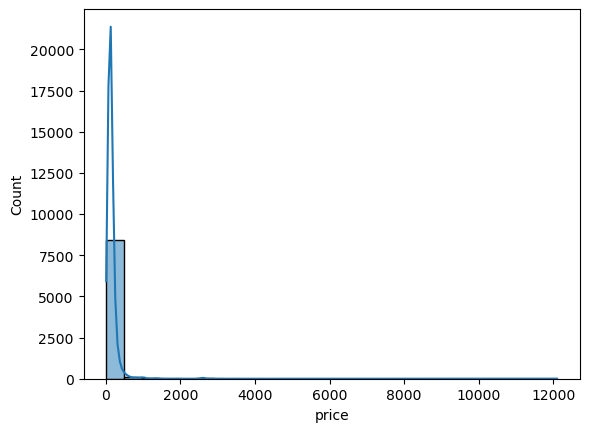

In [14]:
# Visualizing the distribution of 'price' to show extreme values

sns.histplot(sublistings['price'], bins=25, kde=True)  

# Display the plot

plt.show()

In [15]:
# Removing rows where the price is greater than 2000

sublistings = sublistings[sublistings['price'] <= 2000]

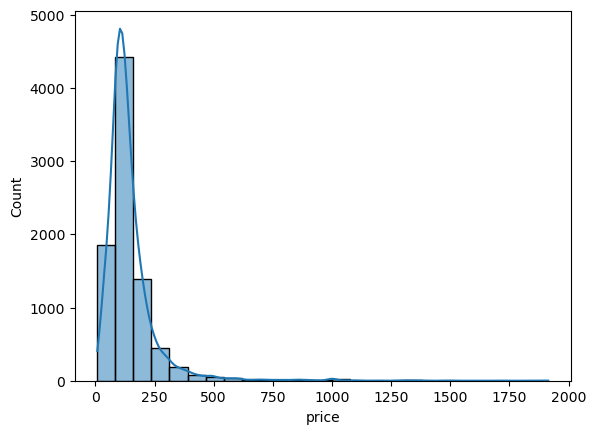

In [16]:
# Visualizing again the distribution of 'price' to show extreme values

sns.histplot(sublistings['price'], bins=25, kde=True)  

# Display the plot

plt.show()

In [17]:
# Check the mean

sublistings['price'].mean()

145.8187558465856

In [18]:
# Check the median

sublistings['price'].median() 

119.0

In [19]:
# Check the max

sublistings['price'].max() 

1914.0

## 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

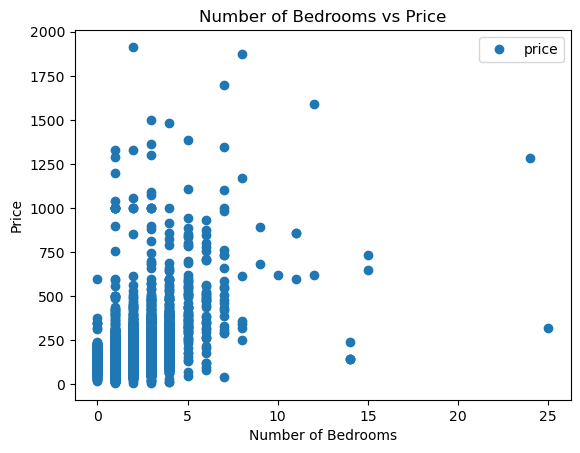

In [21]:
# Create a scatterplot using matplotlib to see how the variables 'bedrooms' and 'price' relate to each other

sublistings.plot(x='bedrooms', y='price', style='o')  # The style 'o' creates a scatterplot
plt.title('Number of Bedrooms vs Price')  
plt.xlabel('Number of Bedrooms')  
plt.ylabel('Price')  
plt.show()

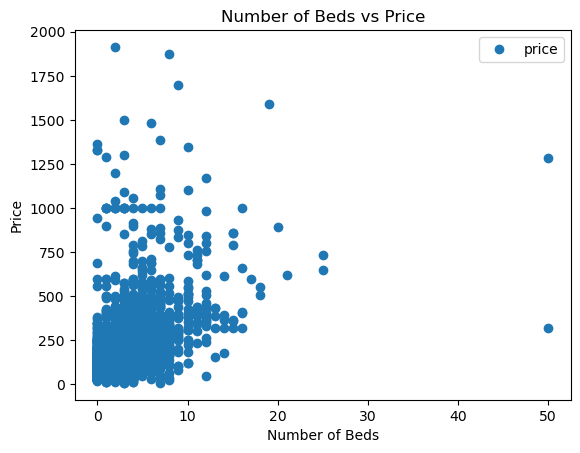

In [22]:
# Create a scatterplot using matplotlib to see how the variables 'beds' and 'price' relate to each other

sublistings.plot(x='beds', y='price', style='o')  # The style 'o' creates a scatterplot
plt.title('Number of Beds vs Price')  
plt.xlabel('Number of Beds')  
plt.ylabel('Price')  
plt.show()

## 5. State your hypothesis in a markdown cell within your Jupyter notebook.

### Hypothesis: Properties with more beds have higher prices

## 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = sublistings['beds'].values.reshape(-1,1)
y = sublistings['price'].values.reshape(-1,1)


In [27]:
X

array([[2.],
       [5.],
       [2.],
       ...,
       [3.],
       [6.],
       [1.]])

In [28]:
y

array([[178.],
       [219.],
       [141.],
       ...,
       [134.],
       [333.],
       [ 30.]])

### 7. Split the data into two sets: a training set and a test set.

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8. Run a linear regression on the data.

    First, fit the model you created to the training set.
    Then, create a prediction for y on the test set.

In [32]:
# Create a regression object

regression = LinearRegression() 

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 9. Create a plot that shows the regression line on the test set.

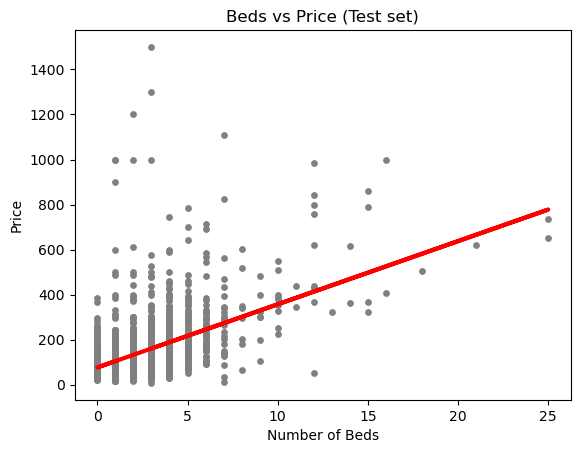

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)  # Real data points
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)  # Regression line
plot_test.title('Beds vs Price (Test set)')  # Adjusted title
plot_test.xlabel('Number of Beds')  # Adjusted x-label
plot_test.ylabel('Price')  # Adjusted y-label
plot_test.show()

## 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### The line indicates a positive correlation between the number of beds and the price. As the number of beds increases, the price generally tends to increase as well.
### The wide spread of prices for properties with fewer beds suggest that other factors might be influencing the prices
### The regression line is not a perfect prediction of price. The points below the line for properties with more than 10 beds indicates that the model is not very precise

## 11. Check the model performance statistics—MSE and R2 score.

In [76]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  


# Print the model summary statistics. 

print('Slope:', regression.coef_)
print('Intercept:', regression.intercept_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[28.04926182]]
Intercept: [76.66524582]
Mean squared error: 9830.463158123157
R2 score: 0.2515821534192819


## 12. Compare the predicted y values with the actual y values in a dataframe.

In [79]:
y_predicted

array([[104.71450763],
       [ 76.66524582],
       [104.71450763],
       ...,
       [160.81303127],
       [104.71450763],
       [160.81303127]])

In [81]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})


# Display the first 30 rows of the dataframe

data.head(30)

,Actual,Predicted
0,136.0,104.714508
1,200.0,76.665246
2,113.0,104.714508
3,231.0,188.862293
4,63.0,104.714508
5,125.0,104.714508
6,300.0,244.960817
7,104.0,188.862293
8,111.0,132.763769
9,115.0,160.813031


In [85]:
# Predict the y values for the training set

y_predicted_train = regression.predict(X_train) 

In [87]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [89]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[28.04926182]]
Mean squared error:  11668.500870067604
R2 score:  0.21717985221488045


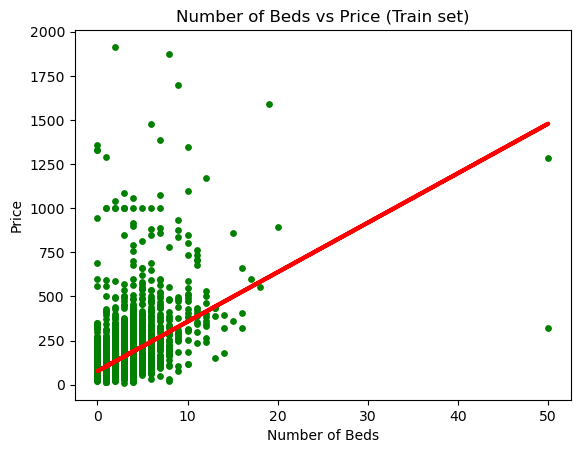

In [91]:
# Visualizing the training set results

plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s=15)  # Actual training data points
plot_train.plot(X_train, y_predicted_train, color='red', linewidth=3)  # Regression line
plot_train.title('Number of Beds vs Price (Train set)')
plot_train.xlabel('Number of Beds')
plot_train.ylabel('Price')
plot_train.show()

## 13. Include your thoughts on how well the model performed on the test set in a markdown cell.

    Include any reflections you have on the impact of possible data bias.

### The overall performance of the model shows significant areas for future improvement.
### The *slope* indicates that for each additional bed, the average price increases by 28.05.
### The *intercept* indicates that 76.67 is the base price when there are zero beds.
### The *MSE* of 9830.46 is relatively high, suggesting considerable error in the model's predictions.
### The *R2* of 0.2516 indicates that only 25.16% of the price variability is explained by the model, suggesting that the model does not capture the complexity of the variability.
### Observing the actual and predicted values, we also see that the model both underestimates and overestimates the actual prices.
### Regarding the impact of data bias, it seems evident and reasonable that the price cannot be explained solely by the number of beds, and there are other factors influencing it. There are also some outliers in both price and beds (50) that must be influencing the model.
### To improve the model, we should include more variables.